# Make a store

In [133]:
import os.path
from plunk.sb.sms.utils import DfLocalFileReader as Reader
  
# Path
path = '~/Dropbox/_odata/sound/induction_motor_data/Healthy/Healthy_750rpm/'
full_path = os.path.expanduser(path)

# store
store = Reader(full_path)

# try one key
key = list(store.keys())[0]

store[key]


AttributeError: 'NoneType' object has no attribute 'get'

# Statistics over the dataset

In [2]:
# how many sessions we have
len(store)

462

In [3]:
# do we have the same columns names across all the datasets?
from plunk.sb.sms.utils import set_of_concatenated_col_names

# if yes, the set has only one element
set_of_concatenated_col_names(store)

{'dataType-deviceId-flux-motorId-tempe-tempm-tenantId-timestamp-ts-tsr-vbat-vibx-vibz'}

# Split stores between metadata and data

## Metadata store

In [4]:
from plunk.sb.sms.utils import metadata_store, data_store
metadata = metadata_store(store)
metadata[key]


,dataType,deviceId,motorId,tempe,tempm,tenantId,timestamp,ts,tsr,vbat
0,completeSample,00000781O,adi#0c7dbd85-a5e7-4e6a-b37c-a49e1adaca45,"[25.3125, 25.3125]","[25.3125, 25.3125]",adi,1611413831736,42297,False,"[3.122389478, 3.143878738, 3.122389478, 3.1460..."


## Data store

In [5]:
store[key]

,dataType,deviceId,flux,motorId,tempe,tempm,tenantId,timestamp,ts,tsr,vbat,vibx,vibz
0,completeSample,00000781O,"[-41.0776, -36.7222, -45.2256, -38.174, -25.31...",adi#0c7dbd85-a5e7-4e6a-b37c-a49e1adaca45,"[25.3125, 25.3125]","[25.3125, 25.3125]",adi,1611413831736,42297,False,"[3.122389478, 3.143878738, 3.122389478, 3.1460...","[0.45430000000000004, -0.20974, 0.952330000000...","[-0.35202000000000006, -1.6801, 0.97606, 0.478..."


In [8]:
datastore = data_store(store)
df = datastore[key]
df

,flux,vibx,vibz
0,-41.0776,0.45430,-0.35202
1,-36.7222,-0.20974,-1.68010
2,-45.2256,0.95233,0.97606
3,-38.1740,0.28829,0.47803
4,-25.3152,0.78632,0.14601
...,...,...,...
14995,63.8668,0.45430,-2.51015
14996,66.3556,0.45430,-0.85005
14997,65.5260,-0.37575,-0.68404
14998,63.0372,0.95233,2.30414


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

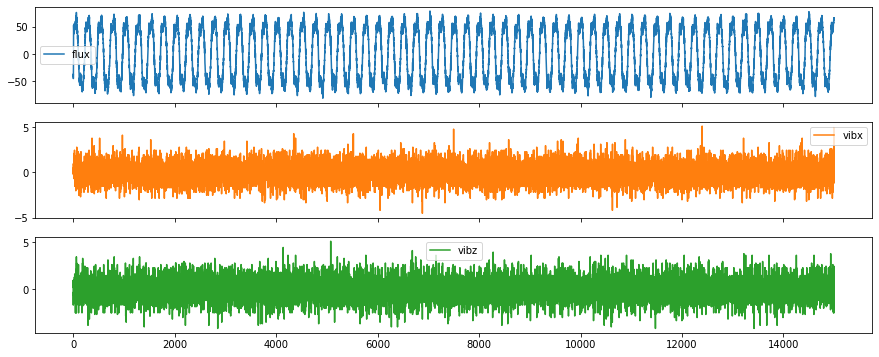

In [9]:
df.plot(figsize = (15,6), subplots = True)

# Scrap

## the dacc way

In [28]:
from tabled import (DfLocalFileReader, dflt_ext_mapping, 
                    df_from_data_according_to_key, 
                    get_ext,
                    identity, 
                    key_func_mapping,
                    split_keys
)
from functools import partial 
import pandas as pd

#update dflt_ext_mapping
dflt_ext_mapping['json']

df_from_data_according_to_ext = partial(
    df_from_data_according_to_key, mapping=dflt_ext_mapping, key=get_ext,
)

In [29]:
# Path
path = '~/Dropbox/_odata/sound/induction_motor_data/Healthy/Healthy_750rpm/'
full_path = os.path.expanduser(path)

In [35]:
def df_from_json(data, ext_specs={"orient": "index"}, **kwargs):
    """Get a dataframe from a (data, ext) pair"""
    kwargs = dict(ext_specs, **kwargs)
    return pd.read_json(data, **kwargs).T 

dflt_ext_mapping['json']=df_from_json


In [36]:
import os.path

# Path
path = "~/Dropbox/_odata/sound/induction_motor_data/"
full_path = os.path.expanduser(path)

dflt_ext_mapping["json"] = df_from_json
# df_from_data_according_to_ext = partial(
#     df_from_data_according_to_key,
#     mapping=dflt_ext_mapping,
#     key=get_ext,
# ) 
# store
store = DfLocalFileReader(full_path)

# try one key
key = list(store.keys())[0]
store[key]

been used!


,dataType,deviceId,flux,motorId,tempe,tempm,tenantId,timestamp,ts,tsr,vbat,vibx,vibz
0,completeSample,00000781O,"[-108.0019, -105.9279, -106.9649, -120.0311, -...",adi#0c7dbd85-a5e7-4e6a-b37c-a49e1adaca45,"[24.8125, 24.8125]","[24.875, 24.875]",adi,1611658164045,52822,False,"[3.150325516, 3.133134108, 3.1159427, 3.143878...","[0.13148, -0.8645800000000001, -0.200540000000...","[0.18612, -1.47398, -1.806, -0.975950000000000..."


In [5]:
dflt_ext_mapping = split_keys(
    {
        "xls xlsx": partial(pd.read_excel, index=False),
        "csv": partial(pd.read_csv, index_col=False),
        "tsv": partial(pd.read_csv, sep="\t", index_col=False),
        #"json": partial(pd.read_json, orient="records"),
        "json": partial(pd.read_json, orient="index"),

        "html": partial(pd.read_html, index_col=False),
        #"p pickle": pickle.load,
    }
)
dflt_ext_mapping["json"]=df_from_json
def df_from_data_given_ext(data, ext, mapping=dflt_ext_mapping, **kwargs):
    """Get a dataframe from a (data, ext) pair"""
    if ext.startswith('.'):
        ext = ext[1:]
    trans_func = key_func_mapping(
        ext, mapping, key=identity, not_found_sentinel=None, #TODO
    )
    if trans_func is not None:
        return trans_func(data, **kwargs)
    else:
        raise ValueError(f"Don't know how to handle extension: {ext}")


def df_from_data_according_to_key(data, mapping, key, **kwargs):
    """Get a dataframe from a (data, ext) pair"""
    trans_func = key_func_mapping(data, mapping, key=key, not_found_sentinel=None)
    if trans_func is not None:
        return trans_func(data, **kwargs)
    else:
        raise ValueError(f"Don't know how to handle extension: {ext}")

df_from_data_according_to_ext = partial(
    df_from_data_according_to_key,
    mapping=dflt_ext_mapping,
    key=get_ext,
)

In [6]:
dflt_ext_mapping

{'xls': functools.partial(<function read_excel at 0x7fed30b17880>, index=False),
 'xlsx': functools.partial(<function read_excel at 0x7fed30b17880>, index=False),
 'csv': functools.partial(<function read_csv at 0x7fed30b168c0>, index_col=False),
 'tsv': functools.partial(<function read_csv at 0x7fed30b168c0>, sep='\t', index_col=False),
 'json': <function __main__.df_from_json(data, ext_specs={'orient': 'index'}, **kwargs)>,
 'html': functools.partial(<function read_html at 0x7fed30b743a0>, index_col=False)}

In [7]:
from dol import Files

In [8]:
s = DfLocalFileReader(full_path)

k = list(s.keys())[0]

In [9]:
t = Files(full_path)

In [10]:

from io import BytesIO
data = BytesIO(t[k])

In [11]:
data

### df_from_data_given_ext

In [12]:
df_from_data_given_ext(data, ext='json')

,dataType,deviceId,flux,motorId,tempe,tempm,tenantId,timestamp,ts,tsr,vbat,vibx,vibz
0,completeSample,00000781O,"[-108.0019, -105.9279, -106.9649, -120.0311, -...",adi#0c7dbd85-a5e7-4e6a-b37c-a49e1adaca45,"[24.8125, 24.8125]","[24.875, 24.875]",adi,1611658164045,52822,False,"[3.150325516, 3.133134108, 3.1159427, 3.143878...","[0.13148, -0.8645800000000001, -0.200540000000...","[0.18612, -1.47398, -1.806, -0.975950000000000..."


In [14]:
store[k]

,dataType,deviceId,flux,motorId,tempe,tempm,tenantId,timestamp,ts,tsr,vbat,vibx,vibz
0,completeSample,00000781O,"[-108.0019, -105.9279, -106.9649, -120.0311, -...",adi#0c7dbd85-a5e7-4e6a-b37c-a49e1adaca45,"[24.8125, 24.8125]","[24.875, 24.875]",adi,1611658164045,52822,False,"[3.150325516, 3.133134108, 3.1159427, 3.143878...","[0.13148, -0.8645800000000001, -0.200540000000...","[0.18612, -1.47398, -1.806, -0.975950000000000..."


### df_from_data_according_to_key

In [104]:
def df_from_data_according_to_key(data, mapping, key, **kwargs):
    """Get a dataframe from a (data, ext) pair"""
    trans_func = key_func_mapping(data, mapping, key=key, not_found_sentinel=None)
    if trans_func is not None:
        return trans_func(data, **kwargs)
    else:
        raise ValueError(f"Don't know how to handle extension: ")
    
df_from_data_according_to_key(data=data, mapping=dflt_ext_mapping, key=get_ext)

ValueError: Expected object or value

In [102]:
get_ext(k)

'json'

In [45]:
ext = "json"
ext_specs=None
trans_func = key_func_mapping(
        ext, ext_specs or dflt_ext_mapping, key=identity, not_found_sentinel=None, #TODO
    )

In [65]:
def df_from_data_according_to_key(data, mapping, key, **kwargs):
    """Get a dataframe from a (data, ext) pair"""
    trans_func = key_func_mapping(data, mapping, key=key, not_found_sentinel=None)
    if trans_func is not None:
        return trans_func(data, **kwargs)
    else:
        raise ValueError(f"Don't know how to handle extension: {ext}")


def get_ext(x):
    _, ext = os.path.splitext(x)
    if ext:
        return ext[1:].lower()
    else:
        return ext


df_from_data_according_to_ext = partial(
    df_from_data_according_to_key,
    mapping=dflt_ext_mapping,
    key=get_ext,
)

In [66]:
df_from_data_according_to_ext(data)

TypeError: expected str, bytes or os.PathLike object, not BytesIO

In [18]:
for key in ['flux',
 'motorId',
 'tempe',
 'tempm',
 'tenantId',
 'timestamp',
 'ts',
 'tsr',
 'vbat',
 'vibx',
 'vibz']:
    try:
        print(f'{key=}, {len(d[key])=}')
    except TypeError:
        print(f'{key=}, {d[key]=}')


key='flux', len(d[key])=15000
key='motorId', len(d[key])=40
key='tempe', len(d[key])=2
key='tempm', len(d[key])=2
key='tenantId', len(d[key])=3
key='timestamp', d[key]=1611413831736
key='ts', d[key]=42297
key='tsr', d[key]=False
key='vbat', len(d[key])=4
key='vibx', len(d[key])=15000
key='vibz', len(d[key])=15000


In [23]:
d['motorId'], d['tempe'], d['tempm'], d['tenantId'], d['vbat']

('adi#0c7dbd85-a5e7-4e6a-b37c-a49e1adaca45',
 [25.3125, 25.3125],
 [25.3125, 25.3125],
 'adi',
 [3.122389478, 3.143878738, 3.122389478, 3.146027664])

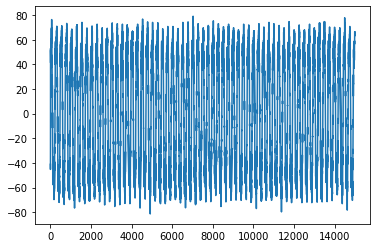

In [26]:
import numpy as np
import matplotlib.pyplot as plt
arr = np.array(d['flux'])
plt.plot(arr)

In [27]:
import pandas as pd

In [29]:
df=pd.DataFrame()
for key in ['flux', 'vibx','vibz']:
  df[key]=np.array(d[key])

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

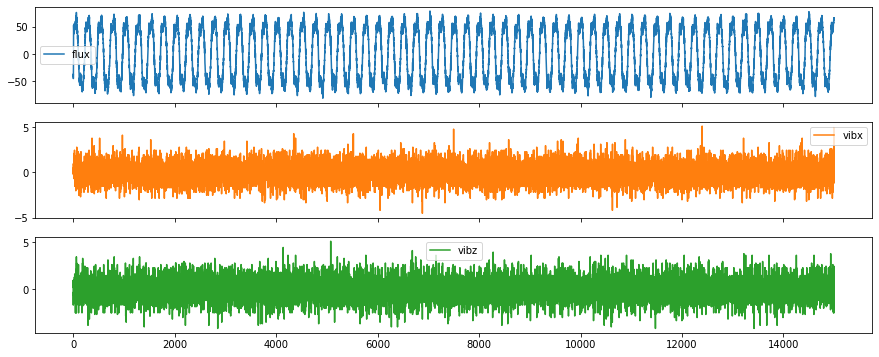

In [31]:
df.plot(figsize=(15,6), subplots=True)

#  tabled reloaded

In [32]:

# Import pandas
import pandas as pd

# Read json from String
json_str = '{"Courses":{"r1":"Spark"},"Fee":{"r1":"25000"},"Duration":{"r1":"50 Days"}}'
df = pd.read_json(json_str)
print(df)

# Outputs
#   Courses    Fee Duration
#r1   Spark  25000  50 Days


   Courses    Fee Duration
r1   Spark  25000  50 Days


ValueError: too many values to unpack (expected 2)

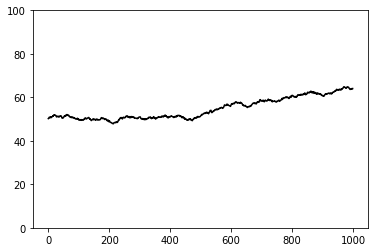

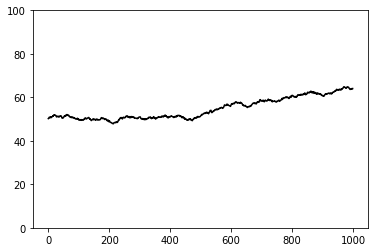

In [119]:
fig, ax = plt.subplots()

# Plot the data.
line = ax.plot(bm[0], '-k')[0]
ax.set_ylim(0, 100)
plt.show()

In [116]:
line

In [118]:
plt.show(line)

In [15]:
from dol.base import Store

def test_wrap_kvs_vs_class_and_static_methods():
    """Adding wrap_kvs breaks methods when called from class

    That is, when you call Klass.method() (where method is a normal, class, or static)

    https://github.com/i2mint/dol/issues/17
    """

    @Store.wrap
    class MyFiles:
        y = 2

        def normal_method(self, x=3):
            return self.y * x

        @classmethod
        def hello(cls):
            print('hello')

        @staticmethod
        def hi():
            print('hi')

    errors = []

    # This works fine!
    instance = MyFiles()
    assert instance.normal_method() == 6

    # But calling the method as a class...
    try:
        MyFiles.normal_method(instance)
    except Exception as e:
        print('method normal_method is broken by wrap_kvs decorator')
        print(f'{type(e).__name__}: {e}')
        errors.append(e)

    try:
        MyFiles.hello()
    except Exception as e:
        print('classmethod hello is broken by wrap_kvs decorator')
        print(f'{type(e).__name__}: {e}')
        errors.append(e)

    try:
        MyFiles.hi()
    except Exception as e:
        print('staticmethod hi is broken by wrap_kvs decorator')
        print(f'{type(e).__name__}: {e}')
        errors.append(e)

    if errors:
        first_error, *_ = errors
        raise first_error

# launch test:
test_wrap_kvs_vs_class_and_static_methods()


method normal_method is broken by wrap_kvs decorator
TypeError: 'DelegatedAttribute' object is not callable
classmethod hello is broken by wrap_kvs decorator
TypeError: 'DelegatedAttribute' object is not callable
staticmethod hi is broken by wrap_kvs decorator
TypeError: 'DelegatedAttribute' object is not callable


TypeError: 'DelegatedAttribute' object is not callable

In [16]:
@Store.wrap
class MyFiles:
    y = 2

    def normal_method(self, x=3):
        return self.y * x

    @classmethod
    def hello(cls):
        print('hello')

    @staticmethod
    def hi():
        print('hi')

errors = []

# This works fine!
instance = MyFiles()
assert instance.normal_method() == 6

    

In [17]:
MyFiles.normal_method(instance)
    

TypeError: 'DelegatedAttribute' object is not callable

In [26]:
method_list = [func for func in dir(MyFiles) if callable(getattr(MyFiles, func)) and not func.startswith("__")]
method_list

['ItemsView',
 'KeysView',
 'ValuesView',
 '_data_of_obj',
 '_id_of_key',
 '_key_of_id',
 '_obj_of_data',
 'clear',
 'get',
 'head',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'wrap']

In [27]:
type(MyFiles.hello)

dol.base.DelegatedAttribute

In [23]:
from dol.base import DelegatedAttribute

In [24]:
DelegatedAttribute??

Init signature: DelegatedAttribute(delegate_name, attr_name)
Docstring:      <no docstring>
Source:        
class DelegatedAttribute:
    def __init__(self, delegate_name, attr_name):
        self.attr_name = attr_name
        self.delegate_name = delegate_name

    def __get__(self, instance, owner):
        if instance is None:
            return self  # .__wrapped__  # TODO: The __wrapped__ would make it hard to debug
        else:
            # i.e. return instance.delegate.attr
            return getattr(getattr(instance, self.delegate_name), self.attr_name)

    def __set__(self, instance, value):
        # instance.delegate.attr = value
        setattr(getattr(instance, self.delegate_name), self.attr_name, value)

    def __delete__(self, instance):
        delattr(getattr(instance, self.delegate_name), self.attr_name)
File:           ~/Desktop/dev/otosense/dol/dol/base.py
Type:           type
Subclasses:     


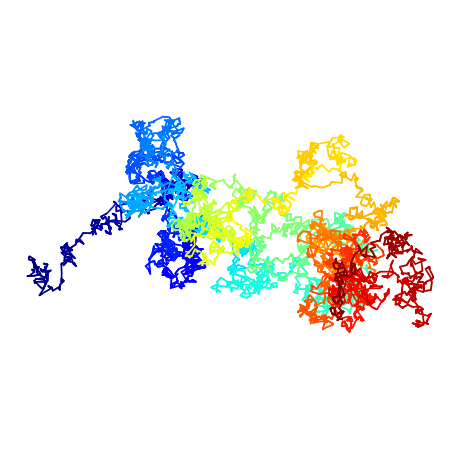

<AxesSubplot: >

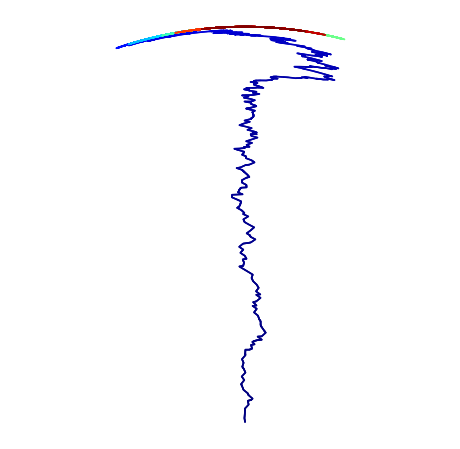

In [52]:
simple_run()

In [53]:
from boltons.iterutils import remap

data = {'one': 'remains', 'this': 'goes', 'of': 'course'}
bad_keys = set(['this', 'is', 'a', 'list', 'of', 'keys'])

drop_keys = lambda path, key, value: key not in bad_keys
clean = remap(data, visit=drop_keys)
print(clean)

# Output:
{'one': 'remains'}

{'one': 'remains'}


{'one': 'remains'}

In [58]:
>>> from pprint import pprint
>>> reviews = {'Star Trek': {'TNG': 10, 'DS9': 8.5, 'ENT': None},
...            'Babylon 5': 6, 'Dr. Who': None}
>>> pprint(remap(reviews, lambda p, k, v: v ==10))

{}


In [61]:
from functools import reduce  # forward compatibility for Python 3
import operator

def get_by_path(root, items):
    """Access a nested object in root by item sequence."""
    return reduce(operator.getitem, items, root)

def set_by_path(root, items, value):
    """Set a value in a nested object in root by item sequence."""
    get_by_path(root, items[:-1])[items[-1]] = value

def del_by_path(root, items):
    """Delete a key-value in a nested object in root by item sequence."""
    del get_by_path(root, items[:-1])[items[-1]]



In [63]:
dataDict = {
    "a":{
        "r": 1,
        "s": 2,
        "t": 3
        },
    "b":{
        "u": 1,
        "v": {
            "x": 1,
            "y": 2,
            "z": 3
        },
        "w": 3
        }
}    

assert get_by_path(dataDict, ["a", "r"])==1

assert get_by_path(dataDict, ["b", "v", "y"])==2



In [64]:
set_by_path(dataDict, ["b", "v", "w"], 4)
import pprint
pprint.pprint(dataDict)

{'a': {'r': 1, 's': 2, 't': 3},
 'b': {'u': 1, 'v': {'w': 4, 'x': 1, 'y': 2, 'z': 3}, 'w': 3}}


In [65]:
get_by_path(dataDict, ["a"])

{'r': 1, 's': 2, 't': 3}

In [67]:
del_by_path(dataDict, ["a"])
pprint.pprint(dataDict)

{'b': {'u': 1, 'v': {'w': 4, 'x': 1, 'y': 2, 'z': 3}, 'w': 3}}


In [75]:
def get_all_path_keys(d):
    res = []

    for key, value in d.items():
        res.append([str(key)])
        if isinstance(value, dict):
            res += [[str(key)]+item for item in get_all_path_keys(value)]
    return res


d = {'dict1': {'foo': 1, 'bar': 2}, 'dict2': {'dict3': {'baz': 3, 'quux': 4}}}
for x in get_all_path_keys(d):
    print(x)

['dict1']
['dict1', 'foo']
['dict1', 'bar']
['dict2']
['dict2', 'dict3']
['dict2', 'dict3', 'baz']
['dict2', 'dict3', 'quux']


In [90]:
from boltons.iterutils import remap

def get_all_keys(d):
    res = []
    def append_keys(path, key, value):
        res.append(list(path)+[key]) 
        return key, value
    remap(d, visit=append_keys)
    return res

get_all_keys(d)



[['dict1', 'foo'],
 ['dict1', 'bar'],
 ['dict1'],
 ['dict2', 'dict3', 'baz'],
 ['dict2', 'dict3', 'quux'],
 ['dict2', 'dict3'],
 ['dict2']]

In [89]:
res

[['dict1', 'foo'],
 ['dict1', 'bar'],
 ['dict1'],
 ['dict2', 'dict3', 'baz'],
 ['dict2', 'dict3', 'quux'],
 ['dict2', 'dict3'],
 ['dict2']]

In [77]:
flatten(d)

['dict1', 'dict2']